In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image

# Directories for training and validation data
train_dir = r"C:\Users\Siddhant\Downloads\chest_xray\train"
val_dir =  r"C:\Users\Siddhant\Downloads\chest_xray\val"     # Update with your validation directory path

# Function to check if the image file is valid
def is_valid_image(filepath):
    try:
        img = Image.open(filepath)
        img.verify()  # Verify that it's a valid image
        return True
    except (IOError, SyntaxError):
        return False

# Function to clean directories from invalid images
def clean_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            if not is_valid_image(filepath):
                print(f"Removing invalid image: {filepath}")
                os.remove(filepath)

# Clean both train and validation directories
clean_directory(train_dir)
clean_directory(val_dir)

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data rescaling for validation set
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Generate batches of tensor image data for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # DenseNet121 expects images of this size
    batch_size=32,
    class_mode='binary'  # 'binary' since it's binary classification (Pneumonia vs Normal)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load the pre-trained DenseNet121 model + higher level layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # 'sigmoid' for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_densenet121.keras', save_best_only=True)  # .keras format

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,  # Adjust the number of epochs based on your dataset
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/50


C:\Users\Siddhant\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.8574 - loss: 0.3402 - val_accuracy: 0.8125 - val_loss: 0.5014
Epoch 2/50


C:\Users\Siddhant\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5014
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 485s 3s/step - accuracy: 0.9138 - loss: 0.2045 - val_accuracy: 0.8125 - val_loss: 0.3933
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.3933
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 457s 3s/step - accuracy: 0.9378 - loss: 0.1605 - val_accuracy: 0.8125 - val_loss: 0.2358
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.2358
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.9397 - loss: 0.1508 - val_accuracy: 0.8125 - val_loss: 0.2609
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.2609
Epoch 9/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.9389 - loss

Found 16 images belonging to 2 classes.


C:\Users\Siddhant\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.78      0.88      0.82         8
   Pneumonia       0.86      0.75      0.80         8

    accuracy                           0.81        16
   macro avg       0.82      0.81      0.81        16
weighted avg       0.82      0.81      0.81        16



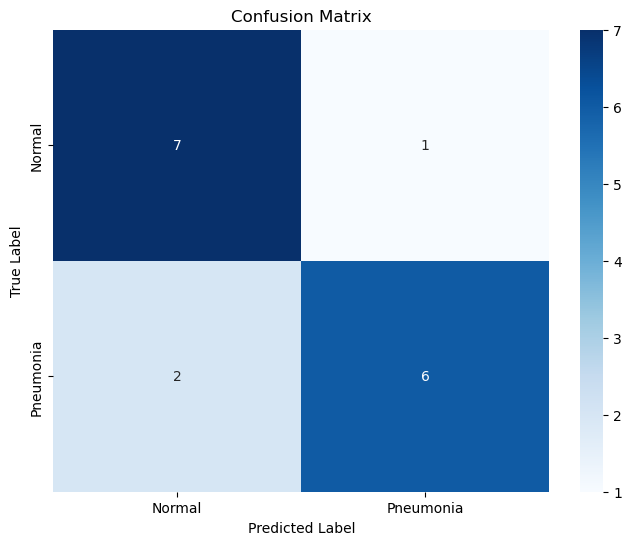

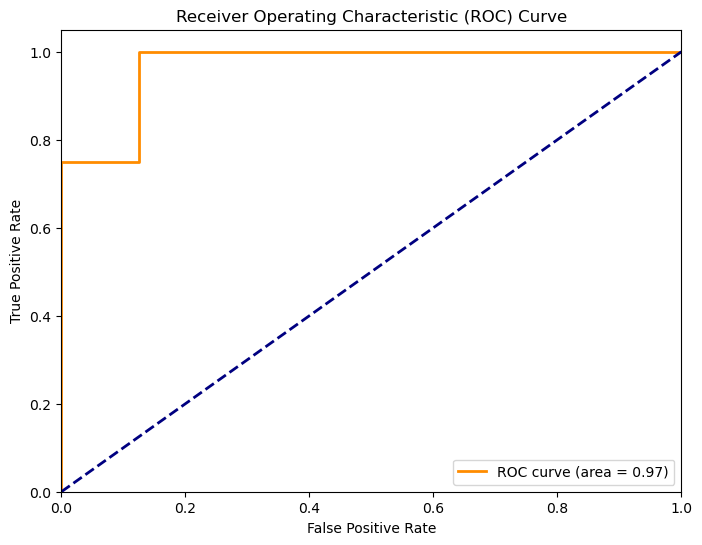

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model_densenet121.keras')

# Data rescaling for validation set
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Directories for validation data
val_dir = r"C:\Users\Siddhant\Downloads\chest_xray\val" # Update with your test directory path

# Generate batches of tensor image data for validation
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Set shuffle=False to ensure correct matching between predictions and labels
)

# Get predictions from the model
predictions = model.predict(val_generator, steps=len(val_generator), verbose=1)
y_pred = (predictions > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions and flatten to 1D

# Ensure y_true matches the number of predictions
y_true = val_generator.classes[:len(y_pred)]  # Use only the same number of samples as y_pred

# Calculate precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


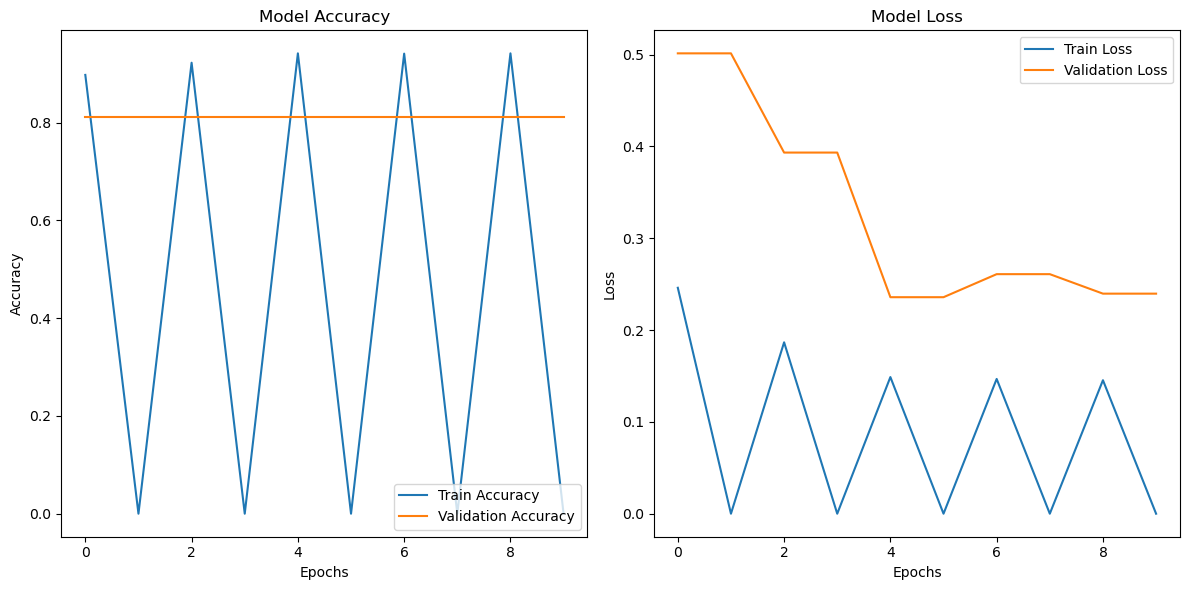

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()
